In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_squared_error
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("data 3.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# This code removes the columns "id" and "Unnamed: 32" from the Pandas DataFrame "df:
df.drop(['id','Unnamed: 32'],inplace = True, axis = 1)

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# diagnosis_value that takes a single argument called diagnosis. If diagnosis is equal to 'M', the function returns 1, otherwise it returns 0.
def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0

df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

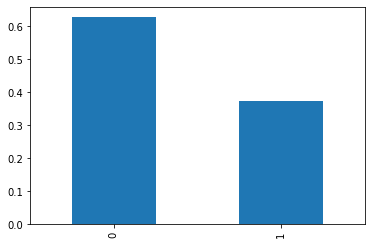

In [10]:
df["diagnosis"].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [11]:
X= df.drop("diagnosis",axis=1)
y= df["diagnosis"]

In [12]:
# This code performs oversampling using the Synthetic Minority Over-sampling Technique (SMOTE) to balance the classes in the target variable y.
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_resample(X, y)


In [13]:
# This code splits the data into training and testing sets using the train_test_split() function from the Scikit-learn library.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train.shape)
print(X_test.shape)

(499, 30)
(215, 30)


In [14]:
# This function scales the data to have zero mean and unit variance, and then assigns the standardized data to X_train and X_test as Pandas DataFrames.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train))
X_test=pd.DataFrame(sc.transform(X_test))
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.998521,-0.615949,-0.981893,-0.921459,1.693234,-0.046814,-0.731849,-0.305276,0.523188,2.514340,...,-1.079506,-0.914325,-1.064154,-0.927361,1.467568,-0.428733,-0.845625,-0.454149,-0.234499,1.720167
1,-0.723712,-0.191288,-0.766445,-0.709718,-0.966306,-0.976457,-1.141727,-1.163395,-1.002637,-0.294570,...,-0.687700,0.126916,-0.760076,-0.675067,-0.196542,-0.848798,-1.238526,-1.130344,-0.068345,-0.209869
2,-0.808903,0.114087,-0.788746,-0.778238,0.907494,0.085560,-0.387809,-0.438291,0.672329,0.295476,...,-0.751996,-0.013125,-0.691179,-0.706209,0.111296,-0.514726,-0.504141,-0.699635,0.410179,-0.261380
3,-0.850124,-0.320118,-0.877156,-0.797316,-0.875011,-0.964922,-0.817983,-0.930444,-1.151778,-0.569925,...,-0.862505,-0.373934,-0.872289,-0.787476,0.039913,-0.566692,-0.550973,-0.641666,0.479964,-0.327914
4,1.507738,-0.038600,1.509104,1.452572,1.236757,0.743647,1.405034,1.783301,-0.356360,-0.287285,...,0.998072,-0.200943,0.968458,0.851019,1.480953,0.134859,1.131078,1.414298,0.184210,-0.214162


In [15]:
# Node represents a node in a decision tree. The __init__ method initializes the attributes of a Node object, 
# The leaf method checks if the node is a leaf node by checking if its value attribute is not None.

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.left = left;self.right = right;self.value = value;self.feature = feature;self.threshold = threshold
    def leaf(self):
        return self.value is not None

In [16]:
class Decision_Tree:
    def __init__(self, maximum_depth=7, minimum_samples_split=2):
        self.maximum_depth = maximum_depth;self.minimum_samples_split = minimum_samples_split;self.root = None;
    # If the maximum depth of the tree has been reached or the number of class labels is 1 or the number of samples is less than.
    # The minimum samples required for a split, it returns True. Otherwise, it returns False.
    def _isfinished(self, depth):
        if (self.maximum_depth<=depth or self.n_class_labels == 1 or self.n_samples < self.minimum_samples_split):
            return True
        return False
    # The method first calculates the number of labels in y, and if there is only one label or none, it returns 0.
    #  It then calculates the probability of each label, and uses them to calculate the entropy .
    def _entropy(self, y):
        labels = len(y)
        if labels <= 1:
          return 0
        counts = np.bincount(y)
        probabilities = counts / labels
        entropy = 0
        for probs in probabilities:
          if probs > 0:
              entropy -= probs * np.log2(probs)
        return entropy
      #  The method first calculates the entropy of the parent node, and then uses the _create_split method to create left and right splits. 
      #  It then calculates the entropy of the left and right splits and combines them to calculate the child loss.
      #  Finally, it calculates the information gain by subtracting the child loss from the parent loss. 
    def _information_gain(self, X, y, threshold):
        parent_loss = self._entropy(y)
        left_idx, right_idx = self._create_split(X, threshold)
        n, left, right = len(y), len(left_idx), len(right_idx)
        if left == 0 or right == 0: 
            return 0
        child_loss = (left / n) * self._entropy(y[left_idx]) + (right / n) * self._entropy(y[right_idx])
        return parent_loss - child_loss
    def _create_split(self, X, threshold):
        left_idx = np.where(X <= threshold)[0]
        right_idx = np.where(X > threshold)[0]
        return left_idx, right_idx
    def _best_split(self, X, y, features):
      score = [(f, threshold, self._information_gain(X[:, f], y, threshold)) for f in features
              for threshold in np.unique(X[:, f])]
      best_feat, best_thresh, _ = max(score, key=lambda x: x[2])
      return best_feat, best_thresh
    def _tree_build(self, X, y, depth=0):
        self.n_samples, self.n_features = X.shape
        self.n_class_labels = len(np.unique(y))
        # stopping criteria
        if self._isfinished(depth):
            most_common_Label = np.argmax(np.bincount(y))
            return Node(value=most_common_Label)
        rnd_feats = np.random.choice(self.n_features, self.n_features, replace=False)
        best_feat, best_thresh = self._best_split(X, y, rnd_feats)
        left_idx, right_idx = self._create_split(X[:, best_feat], best_thresh)
        left_child = self._tree_build(X[left_idx, :], y[left_idx], depth + 1)
        right_child = self._tree_build(X[right_idx, :], y[right_idx], depth + 1)
        return Node(best_feat, best_thresh, left_child, right_child)
    def _tree_traverse(self, x, node):
      if node.leaf():
            return node.value
      # Otherwise, evaluate the condition at the current node
      feature_idx = node.feature
      threshold = node.threshold
      if x[feature_idx] <= threshold:
          next_node = node.left
      else:
          next_node = node.right
      # Recursively traverse the next node in the decision tree
      return self._tree_traverse(x, next_node)
    def fit(self, X, y):
        self.root = self._tree_build(X, y)
    def predict(self, X):
        predictions = np.apply_along_axis(self._tree_traverse, 1, X, self.root)
        return np.array(predictions)


In [17]:

# It first creates a Counter object from the input y, which counts the frequency of each label.
#  It then uses the most_common method of the Counter object to get the most common label and returns it.
def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common
# It first calculates the number of samples in X, and then uses NumPy's random.choice method to randomly select indices from X with replacement. 
# It then creates a new set of features and target variable by using the selected indices.

def bootstrap_sample(X, y):
    samples = X.shape[0]
    bootstrap_indices = np.random.choice(samples, size=samples, replace=True)
    X_bootstrap = X[bootstrap_indices, :]
    y_bootstrap = y[bootstrap_indices]
    return X_bootstrap,y_bootstrap


In [18]:
class RandomForest:
    
    def __init__(self, n_trees=20, minimum_samples_split=2,
                 maximum_depth=7, n_features=None, n_samples=12):
        self.n_trees = n_trees;self.minimum_samples_split = minimum_samples_split;self.maximum_depth = maximum_depth;self.n_features = n_features;self.n_samples=n_samples;self.trees = []
    # randomly selects indices from the input features using NumPy's random.choice method.
    #  It then creates a decision tree object and fits it to a bootstrap sample of the input features and target variable. 
    #  Finally, it appends the decision tree object to the list of decision trees. The process is repeated for n_trees number of times.
    def fit(self, X, y):
        self.trees = []
        bootstrap_indices = np.random.choice(self.n_samples, 12, replace=False)
        for _ in range(self.n_trees):
            tree = Decision_Tree(minimum_samples_split=self.minimum_samples_split,
                maximum_depth=self.maximum_depth)
            X_sample, y_sample = bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
    # It first generates predictions from each of the decision trees in the forest for the input features X.
    # finds the most common prediction across all the decision trees for each sample. Finally, it returns an array of the most common predictions.
    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)
    # This is a method of a class that generates predictions from each of the decision trees in the fitted random forest model for the input features X.
    #  It returns an array of predictions where each row corresponds to a sample and each column corresponds to a decision tree.
    def pred_print_tree(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        return tree_preds


In [19]:
def plot_confusion_matrix(y_test, y_pred, plt_title):
    c_m=confusion_matrix(y_test, y_pred)
    print("\u0332".join('\nClassification Report for the main implementation\n'),'\n', classification_report(y_test, y_pred))
    sns.heatmap(c_m, fmt='g', annot=True, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return c_m

In [20]:
# 
# This code first converts the DataFrames to their corresponding numpy arrays using the values attribute.
# then applies the squeeze function to remove any unnecessary dimensions.

x = X_train.values
y = y_train.values
X_test =np.asarray(X_test)
y_test = np.asarray(y_test)
x = np.squeeze(x)
y = np.squeeze(y)
X_test = np.squeeze(X_test)
y_test = np.squeeze(y_test)


# print(x.shape)
# print(y.shape)
# print(x2.shape)
# print(y2.shape)

In [21]:
from sklearn.metrics import accuracy_score
clf = RandomForest(n_trees=20)
clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test) 
acc2 = accuracy_score(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred)

print("Accuracy: ", acc2)
print("RMSE: ", rmse   )

Accuracy:  0.958139534883721
RMSE:  0.04186046511627907



̲C̲l̲a̲s̲s̲i̲f̲i̲c̲a̲t̲i̲o̲n̲ ̲R̲e̲p̲o̲r̲t̲ ̲f̲o̲r̲ ̲t̲h̲e̲ ̲m̲a̲i̲n̲ ̲i̲m̲p̲l̲e̲m̲e̲n̲t̲a̲t̲i̲o̲n̲
 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       100
           1       0.96      0.97      0.96       115

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



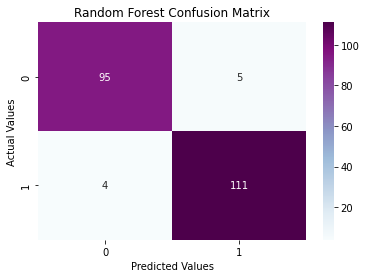

In [22]:
cm_rfc= plot_confusion_matrix(y_test, y_pred, 'Random Forest Confusion Matrix')

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
cv = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)
k_fold_accuracy = []
k_fold_precision = []
k_fold_recall = []
k_fold_f1_score = []

for (train, test), i in zip(cv.split(x,y), range(10)):
  clf = RandomForest(n_trees=3)
  clf.fit(X_train.values, y_train.values)
  pred = clf.predict(X_test)
  k_fold_f1_score.append(f1_score(y_test, pred))
  k_fold_precision.append(precision_score(y_test, pred))
  k_fold_recall.append(recall_score(y_test, pred))
  k_fold_accuracy.append(accuracy_score(y_test, pred))
  print(k_fold_accuracy)

average_cross_val_accuracy = sum(k_fold_accuracy) / len(k_fold_accuracy)
average_cross_val_precision = sum(k_fold_precision) / len(k_fold_precision)
average_cross_val_recall = sum(k_fold_recall) / len(k_fold_recall)
average_cross_val_f1_score= sum(k_fold_f1_score) / len(k_fold_f1_score)

print("Average accuracy after 10-fold cross validation: ",average_cross_val_accuracy)
print("Average f1_score after 10-fold cross validation: ",average_cross_val_f1_score)
print("Average precision after 10-fold cross validation: ",average_cross_val_precision)
print("Average recall after 10-fold cross validation: ",average_cross_val_recall)


[0.9534883720930233]
[0.9534883720930233, 0.958139534883721]
[0.9534883720930233, 0.958139534883721, 0.9488372093023256]
[0.9534883720930233, 0.958139534883721, 0.9488372093023256, 0.9395348837209302]
[0.9534883720930233, 0.958139534883721, 0.9488372093023256, 0.9395348837209302, 0.9348837209302325]
[0.9534883720930233, 0.958139534883721, 0.9488372093023256, 0.9395348837209302, 0.9348837209302325, 0.9534883720930233]
[0.9534883720930233, 0.958139534883721, 0.9488372093023256, 0.9395348837209302, 0.9348837209302325, 0.9534883720930233, 0.9395348837209302]
[0.9534883720930233, 0.958139534883721, 0.9488372093023256, 0.9395348837209302, 0.9348837209302325, 0.9534883720930233, 0.9395348837209302, 0.9441860465116279]
[0.9534883720930233, 0.958139534883721, 0.9488372093023256, 0.9395348837209302, 0.9348837209302325, 0.9534883720930233, 0.9395348837209302, 0.9441860465116279, 0.958139534883721]
[0.9534883720930233, 0.958139534883721, 0.9488372093023256, 0.9395348837209302, 0.9348837209302325, 

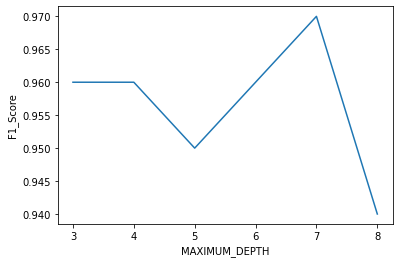

In [24]:
# F1_Score on the y-axis and MAXIMUM_DEPTH on the x-axis
x = [3,4,5,6,7,8]
y = [0.96,0.96,0.95,0.96,0.97,0.94]

# Create a plot
plt.plot(x, y)

# Add labels to the x and y axis
plt.xlabel('MAXIMUM_DEPTH')
plt.ylabel('F1_Score')

# Show the plot
plt.show()




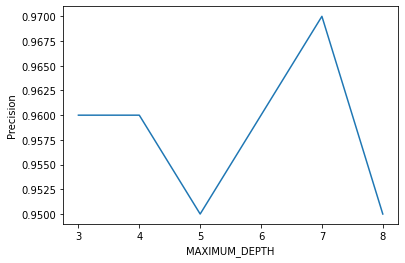

In [25]:
# Precision on the y-axis and MAXIMUM_DEPTH on the x-axis
x = [3,4,5,6,7,8]
y = [0.96,0.96,0.95,0.96,0.97,0.95]

# Create a plot
plt.plot(x, y)

# Add labels to the x and y axis
plt.xlabel('MAXIMUM_DEPTH')
plt.ylabel('Precision')

# Show the plot
plt.show()

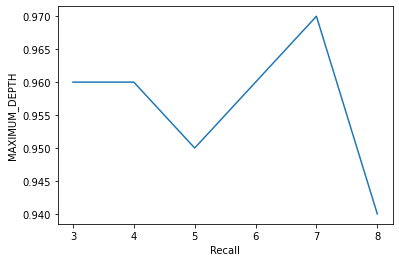

In [26]:
# Recall on the y-axis and MAXIMUM_DEPTH on the x-axis
x = [3,4,5,6,7,8]
y = [0.96,0.96,0.95,0.96,0.97,0.94]
# Create a plot
plt.plot(x, y)

# Add labels to the x and y axis
plt.xlabel('Recall')
plt.ylabel('MAXIMUM_DEPTH')

# Show the plot
plt.show()

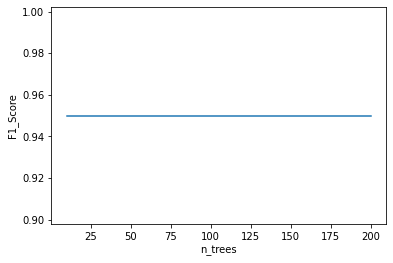

In [27]:
# F1_Score on the y-axis and n_trees on the x-axis
x = [10,50,100,150,200]
y = [0.95,0.95,0.95,0.95,0.95]

# Create a plot
plt.plot(x, y)

# Add labels to the x and y axis
plt.xlabel('n_trees')
plt.ylabel('F1_Score')

# Show the plot
plt.show()

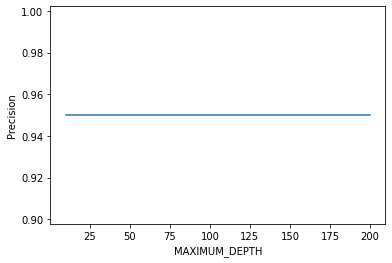

In [28]:
# Precision on the y-axis and MAXIMUM_DEPTH on the x-axis
x = [10,50,100,150,200]
y = [0.95,0.95,0.95,0.95,0.95]

# Create a plot
plt.plot(x, y)

# Add labels to the x and y axis
plt.xlabel('MAXIMUM_DEPTH')
plt.ylabel('Precision')

# Show the plot
plt.show()

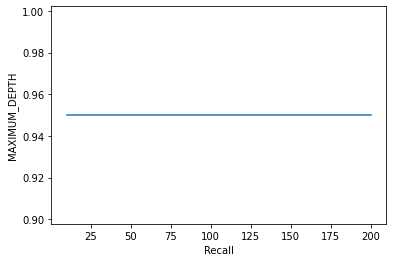

In [29]:
# Recall on the y-axis and MAXIMUM_DEPTH on the x-axis
x = [10,50,100,150,200]
y = [0.95,0.95,0.95,0.95,0.95]
# Create a plot
plt.plot(x, y)

# Add labels to the x and y axis
plt.xlabel('Recall')
plt.ylabel('MAXIMUM_DEPTH')

# Show the plot
plt.show()

#Correctness report

In [30]:
#Correctness report

In [31]:
df2 = pd.read_csv("correct.csv")

In [32]:
df2.head()

,Feature 1,Feature 2,Class/Cluster
0,0.020,0.0,1
1,1.045,0.0,1
2,2.080,0.0,1
3,3.125,0.0,1
4,4.180,0.0,1


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Feature 1      17 non-null     float64
 1   Feature 2      17 non-null     float64
 2   Class/Cluster  17 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 536.0 bytes


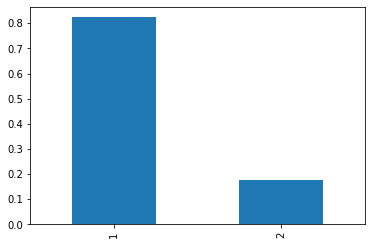

In [34]:
df2["Class/Cluster"].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [35]:
X1= df2.drop("Class/Cluster",axis=1)
y1= df2["Class/Cluster"]

In [36]:
# First, an instance of the MinMaxScaler class is created and stored in the 'MM' variable.
# The fit() method is called on 'MM' to compute the minimum and maximum values of the features in X1,
# The scaled matrix is then assigned back to 'X1'.
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
MM.fit(X1)
X1 = MM.transform(X1)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=1)
print(X_train.shape)
print(X_test.shape)

(11, 2)
(6, 2)


In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train))
X_test=pd.DataFrame(sc.transform(X_test))
X_train.head()

,0,1
0,0.242054,-0.870371
1,-0.753440,-0.870371
2,-0.132646,0.428050
3,-1.078921,-0.870371
4,-0.132646,1.458875


In [39]:
x = np.squeeze(np.asarray(X_train))
y = np.squeeze(np.asarray(y_train))
X_test  = np.squeeze(np.asarray(X_test))
y_test = np.squeeze(np.asarray(y_test))


print(x.shape)
print(y.shape)

(11, 2)
(11,)


In [41]:
from sklearn.model_selection import train_test_split
import collections, numpy
clf = RandomForest(n_trees=20, maximum_depth=7)
array = np.array([[4,4]])

clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(array)

pred=clf.pred_print_tree(array)
print("Accuracy:", y_pred)
print(pred)

num_class1=np.count_nonzero(pred == 1)
num_class2=np.count_nonzero(pred== 2)
print("class 1: ",num_class1)
print("class 2: ",num_class2)
if num_class1>num_class2:
  print("class 1")
else:
  print("class 2")

  

        

Accuracy: [1]
[[1 1 1 1 2 2 1 2 2 2 2 2 2 1 1 1 1 1 1 2]]
class 1:  11
class 2:  9
class 1


In [43]:
from sklearn.metrics import accuracy_score
clf = RandomForest(n_trees=3)
clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test) 
acc2 = accuracy_score(y_test, y_pred)
# acc2 = accuracy(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
# print("Inbuilt Accuracy: ", acc1)
print("Accuracy: ", acc2)
print("RMSE: ", rmse   )

Accuracy:  1.0
RMSE:  0.0



̲C̲l̲a̲s̲s̲i̲f̲i̲c̲a̲t̲i̲o̲n̲ ̲R̲e̲p̲o̲r̲t̲ ̲f̲o̲r̲ ̲t̲h̲e̲ ̲m̲a̲i̲n̲ ̲i̲m̲p̲l̲e̲m̲e̲n̲t̲a̲t̲i̲o̲n̲
 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



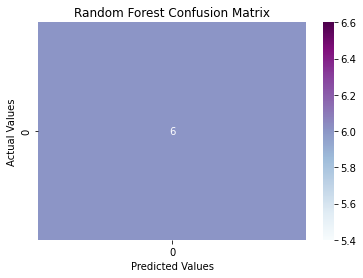

In [44]:
cm_rfc= plot_confusion_matrix(y_test, y_pred, 'Random Forest Confusion Matrix')